In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olgabelitskaya/yale-face-database")

print("Path to dataset files:", path)

C:\Users\dijan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\dijan\.cache\kagglehub\datasets\olgabelitskaya\yale-face-database\versions\1


In [5]:
def load_images_from_folder(folder):
    images = []
    labels = []
    num_images_per_subject = [0 for _ in range(39)]  # Pretpostavljamo da ima 39 subjekata
    for filename in sorted(os.listdir(folder)):
        if filename.startswith("subject"):
            # labela iz imena: subject01 → 1
            label = int(filename[7:9])
            num_images_per_subject[label - 1] += 1


            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert("L")
            img = img.resize((100, 100))

            images.append(np.array(img, dtype=np.float32).flatten() / 255.0)
            labels.append(label)

    return np.array(images), np.array(labels), num_images_per_subject

import os
import numpy as np
from PIL import Image
folder_path = r"C:\Users\dijan\.cache\kagglehub\datasets\olgabelitskaya\yale-face-database\versions\1\data"

images, labels, num_images_per_subject = load_images_from_folder(folder_path)

print(f"Loaded {images.shape[0]} images")
print(f"Each image has {images.shape[1]} pixels")
print(f"Unique labels: {np.unique(labels)}")

# Podjela na trening i test skup
train_images = []
train_labels = []
test_images = []
test_labels = []

for label in np.unique(labels):
    label_images = images[labels == label]
    n_train = int(1 * label_images.shape[0])
    
    train_images.append(label_images[:n_train])
    train_labels.append(np.full(n_train, label))
    
    test_images.append(label_images[n_train:])
    test_labels.append(np.full(label_images.shape[0] - n_train, label))
    
train_images = np.vstack(train_images)
train_labels = np.concatenate(train_labels)

test_images = np.vstack(test_images)
test_labels = np.concatenate(test_labels)

print(f"Training set: {train_images.shape} images")
print(f"Test set: {test_images.shape[0]} images")
print(num_images_per_subject)

X = train_images



Loaded 165 images
Each image has 10000 pixels
Unique labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Training set: (165, 10000) images
Test set: 0 images
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Tensor shape: (15, 11, 10000)


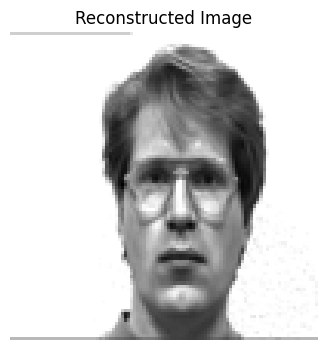

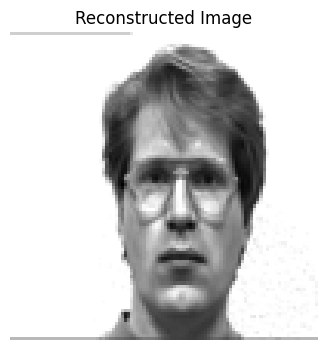

In [8]:
num_per_matrix = 11
num_matrices = X.shape[0] // num_per_matrix

tensor = X.reshape(num_matrices, num_per_matrix, X.shape[1])

print("Tensor shape:", tensor.shape) #(15, 11, 10000)

element = tensor[0, 1, :].reshape(100, 100)  # Prvi element prvog matriksa
import matplotlib.pyplot as plt

# reshape reconstructed vector back to image
reconstructed_img = element.reshape(100, 100)

plt.figure(figsize=(4, 4))
plt.imshow(reconstructed_img, cmap='gray')
plt.axis('off')
plt.title('Reconstructed Image')
plt.show()

A = np.transpose(tensor, (2, 1, 0))

n_i, n_e, n_p = A.shape
A1 = A.reshape(n_i, n_e * n_p)

U, S, Vt = np.linalg.svd(A1, full_matrices=False)
r = n_e * n_p
F = U[:, :r]
S_A = np.tensordot(F.T, A, axes=(1, 0))

# uzmemo prvi frontalni odsječak (prva osoba, ekspresija 1)
reduced_vector = S_A[:, 1, 0]  # svi F komponente za tu osobu i ekspresiju

# vraćanje u originalni prostor pikseli
reconstructed = F @ reduced_vector  # shape: (10000,)
import matplotlib.pyplot as plt

# reshape reconstructed vector back to image
reconstructed_img = reconstructed.reshape(100, 100)

plt.figure(figsize=(4, 4))
plt.imshow(reconstructed_img, cmap='gray')
plt.axis('off')
plt.title('Reconstructed Image')
plt.show()







In [ ]:
A1 = A.reshape(A.shape[0], A.shape[1]*A.shape[2])
A2= A.reshape(A.shape[0]*A.shape[2], A.shape[1]).T
A3 = A.reshape(A.shape[0]*A.shape[1],A.shape[2]).T

B = np.zeros((2,2,2))
B[0,0,0]=1
B[0,1,0]=2
B[1,0,0]=3
B[1,1,0]=4
B[0,0,1]=5
B[0,1,1]=6
B[1,0,1]=7
B[1,1,1]=8
B.reshape(2*2,2)
afor 

[[1. 5.]
 [2. 6.]]
[[3. 7.]
 [4. 8.]]


In [ ]:
import numpy as np

A = np.zeros((2, 3, 4), dtype=float)

for i in range(2):
    for j in range(3):
        for k in range(4):
            A[i, j, k] = (5 ** i) * (3 ** j) * (2 ** k)


np.float64(120.0)

In [54]:
def HOSVD (A):
    A1 = A.reshape(A.shape[0], A.shape[1]*A.shape[2])

    A2 = A.transpose(A,(1,2,0) )
    A2 = A2.reshape(A2.shape[0], A2.shape[1]*A2.shape[2])

    A3 = A.transpose(A,(2,0,1))
    A3 = A3.reshape(A3.shape[0], A3.shape[1]*A3.shape[2])


    U1, S1, V1 = np.linalg.svd(A1,full_matrices=False)
    U2, S2, V2 = np.linalg.svd(A2, full_matrices=False)
    U3, S3, V3 = np.linalg.svd(A3, full_matrices=False)

    A1 = np.tensordot(U1.T, A, axes=(1, 0))
    A2 = np.tensordot(U2.T, A1,axis=(1, 1))
    S = np.tensordot(U3.T, A2, axis=(1, 2))

    return S, U1, U2, U3


In [ ]:
from scipy.linalg import qr

S, U1, U2, U3 = HOSVD(A)
F=U1[:,:(U2.shape[0]*U3.shape[0])]
S = S[:(U2.shape[0]*U3.shape[0]),:,:]

def pretrazivanje(z):
    B = np.tensordot(U2, S, axis=(1, 1))
    for e in range(0,U2.shape[0]):
        Be = B[:,e,:]
        Q, R, P = qr(A, pivoting=True)
        


